In [1]:
from field_kit import FourierAnalysis, make_gaussian_random_field, plaw_with_cutoffs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters for the Gaussian random fields
l_min = 30.0
l_max = 200.0
alpha = -11.0 / 3.0
f_rms = 10.0  # normalization of the field

In [3]:
# Make two power spectra with different l_min values
power_spec = plaw_with_cutoffs(l_min, l_max, alpha)

In [4]:
# Renomalize the power spectra to have the desired RMS value
power_spec.renormalize(f_rms)

In [5]:
# Parameters for the box and grid
le = np.array([0.0, 0.0, 0.0])
re = np.array([750.0, 750.0, 750.0])
ddims = [256] * 3
width = re - le

In [6]:
vx = make_gaussian_random_field(le, re, ddims, power_spec, seed=10)
vy = make_gaussian_random_field(le, re, ddims, power_spec, seed=10)
vz = make_gaussian_random_field(le, re, ddims, power_spec, seed=10)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
# This is the width of the grid on a side (here in kpc, but could be anything)
W = np.array([750.0] * 3)
# This is a class I wrote to simplify stuff
fa = FourierAnalysis(W, ddims)

In [8]:
vtot = np.array([vx, vy, vz])

In [9]:
vc = fa.divergence_component(vtot)
vs = fa.solenoidal_component(vtot)

In [11]:
# Get the power spectrum of each spatial component
nbins = 60  # Number of bins for the power spectrum, it will
# use the min-max wavenumbers as boundaries
kc, Pkc = fa.make_powerspec(vc[0], nbins)
ks, Pks = fa.make_powerspec(vs[1], nbins)

/var/folders/6n/s0lf9frd7zq68c7dhlr090y4c91lh9/T/ipykernel_91839/3547710655.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


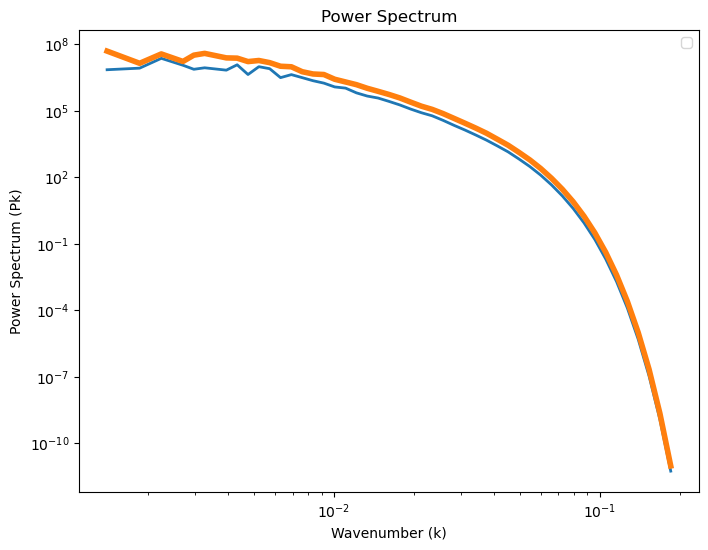

In [12]:
# Now let's plot both the expected and computed power spectra
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(kc, Pkc, label="", lw=2)
ax.loglog(ks, Pks, label="", lw=4)
ax.set_xlabel("Wavenumber (k)")
ax.set_ylabel("Power Spectrum (Pk)")
ax.set_title("Power Spectrum")
ax.legend()

In [13]:
divv = np.gradient(vs[0,...], axis=0)+np.gradient(vs[1,...], axis=1)+np.gradient(vs[2,...], axis=2)

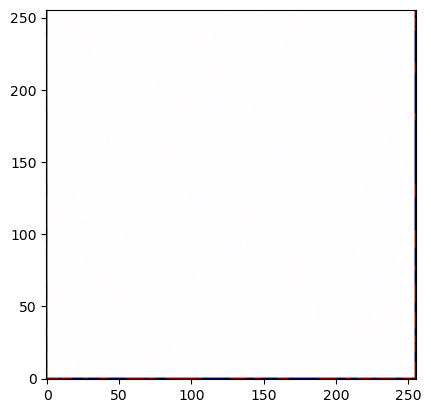

In [14]:
plt.imshow(divv.real[:,:,118], cmap='seismic', vmin=-1.0e-9, vmax=1.0e-9, origin='lower')